### **Dados utilizados:**

- **`ID`**:
    - **Descrição:** Identificador único para cada cliente.
- **`Tipo de empresa`**:
    - **Descrição:** Categoria da empresa, como MEI, ME, EPP, etc.
- **`Fundação da empresa`**:
    - **Descrição:** Ano de fundação da empresa.
- **`Possui mais de um sócio`**:
    - **Descrição:** Indica se a empresa possui mais de um sócio (Sim/Não).
- **`Funcionários`**:
    - **Descrição:** Número de funcionários na empresa.
- **`Meses de permanência`** :
    - **Descrição:** Quantidade de meses que o cliente permaneceu ativo.
- **`Utiliza serviços financeiros`**:
    - **Descrição:** Indica se a empresa utiliza serviços financeiros (Sim/Não).
- **`PossuiContador`**:
    - **Descrição:** Indica se a empresa possui contador (Sim/Não).
- **`Faz conciliação bancária`**:
    - **Descrição:** Indica se a empresa realiza conciliação bancária (Sim/Não).
- **`Frequência de utilização de feature do sistema: Módulo financeiro`**:
    - **Descrição:** Frequência de utilização do módulo financeiro do sistema.
- **`Frequência de utilização de feature do sistema: Emissão de nota fiscal`**:
    - **Descrição:** Frequência de utilização da emissão de nota fiscal no sistema.
- **`Frequência de utilização de feature do sistema: Integração bancária`**:
    - **Descrição:** Frequência de utilização da integração bancária no sistema.
- **`Frequência de utilização de feature do sistema: Módulo de vendas`**:
    - **Descrição:** Frequência de utilização do módulo de vendas no sistema.
- **`Frequência de utilização de feature do sistema: Relatórios`**:
    - **Descrição:** Frequência de utilização de relatórios no sistema.
- **`Frequência de utilização de feature do sistema: Utilização de APIs de integração`**:
    - **Descrição:** Frequência de utilização de APIs de integração no sistema.
- **`Contrato`**:
    - **Descrição:** Tipo de contrato com o cliente.
- **`Emite boletos`**:
    - **Descrição:** Indica se a empresa emite boletos (Sim/Não).
- **`Tipo de pagamento`**:
    - **Descrição:** Método de pagamento utilizado pelo cliente.
- **`Receita mensal`**:
    - **Descrição:** Receita mensal gerada pelo cliente.
- **`Receita total`**:
    - **Descrição:** Receita total gerada pelo cliente.
- **`Churn`**:
    - **Descrição:** Indica se houve churn (cancelamento) do cliente (Sim/Não).


In [1]:
# Bibliotecas principais
import math
import pandas as pd
import numpy as np
import re, unicodedata
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import (
    roc_curve, auc, RocCurveDisplay,
    precision_recall_curve, average_precision_score,
    PrecisionRecallDisplay
)

from sklearn.utils.class_weight import compute_sample_weight

In [2]:
df = pd.read_excel("C:\\Projetos\\Churn_Prediction\\customer_churn_data.xlsx")
df.head()

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,...,Frequência de utilização de feature do sistema: Módulo de vendas,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn
0,1,Micro empresa,2016,Sim,até 5 funcionários,1,Não,NaN,automática,Pouco uso,...,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,29.85,29.85,Não
1,2,Pequena empresa,2018,Não,até 5 funcionários,34,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Pouco uso,Trimestral,0,No,Boleto - mês a mês,56.95,1889.50,Não
2,3,Pequena empresa,2021,Não,até 5 funcionários,2,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - mês a mês,53.85,108.15,Sim
3,4,Pequena empresa,2016,Não,até 5 funcionários,45,Não,NaN,automática,Uso frequente,...,Uso frequente,Pouco uso,Pouco uso,Trimestral,0,No,Cartão de crédito - pagamento único,42.30,1840.75,Não
4,5,Micro empresa,2017,Não,até 5 funcionários,2,Sim,Não,manual,Pouco uso,...,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,70.70,151.65,Sim


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   ID                                                                                7043 non-null   int64  
 1   Tipo de empresa                                                                   7043 non-null   object 
 2   Fundação da empresa                                                               7043 non-null   int64  
 3   Possui mais de um sócio                                                           7043 non-null   object 
 4   Funcionários                                                                      7043 non-null   object 
 5   Meses de permanência                                                              7043 non-null   int64  
 6   

In [4]:
df.describe()

,ID,Fundação da empresa,Meses de permanência,Emite boletos,Receita mensal,Receita total
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000
mean,3522.000000,2016.736476,32.371149,0.592219,64.761692,2283.300441
std,2033.283305,4.582311,24.559481,0.491457,30.090047,2266.771362
min,1.000000,2001.000000,0.000000,0.000000,18.250000,18.800000
25%,1761.500000,2016.000000,9.000000,0.000000,35.500000,401.450000
50%,3522.000000,2018.000000,29.000000,1.000000,70.350000,1397.475000
75%,5282.500000,2020.000000,55.000000,1.000000,89.850000,3794.737500
max,7043.000000,2021.000000,72.000000,1.000000,118.750000,8684.800000


In [5]:
df.isnull().sum()

ID                                                                                    0
Tipo de empresa                                                                       0
Fundação da empresa                                                                   0
Possui mais de um sócio                                                               0
Funcionários                                                                          0
Meses de permanência                                                                  0
Utiliza serviços financeiros                                                          0
PossuiContador                                                                      682
Faz conciliação bancária                                                              0
Frequência de utilização de feature do sistema: Módulo financeiro                     0
Frequência de utilização de feature do sistema: Emissão de nota fiscal                0
Frequência de utilização de feat

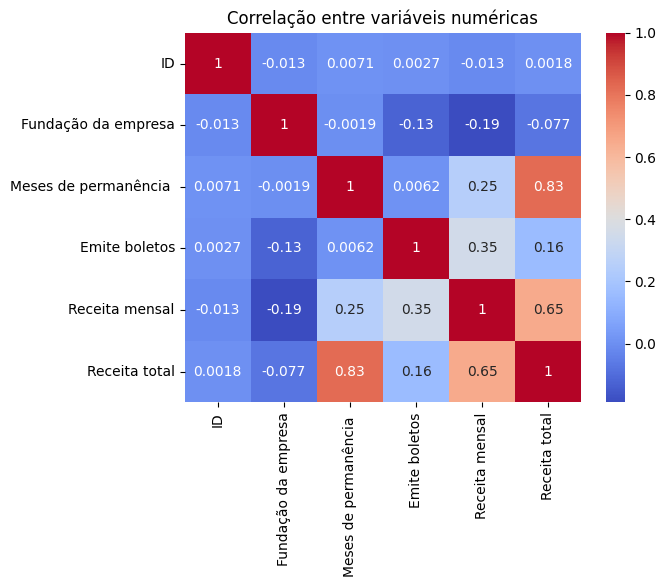

In [6]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlação entre variáveis numéricas")
plt.show()

### Analise univariada

In [7]:
display(df["Churn"].value_counts())
display(df["Churn"].value_counts(normalize=True).map("{:.2%}".format))

Churn
Não    5174
Sim    1869
Name: count, dtype: int64

Churn
Não    73.46%
Sim    26.54%
Name: proportion, dtype: object

C:\Users\josie\AppData\Local\Temp\ipykernel_4324\3948055947.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Blues_r")


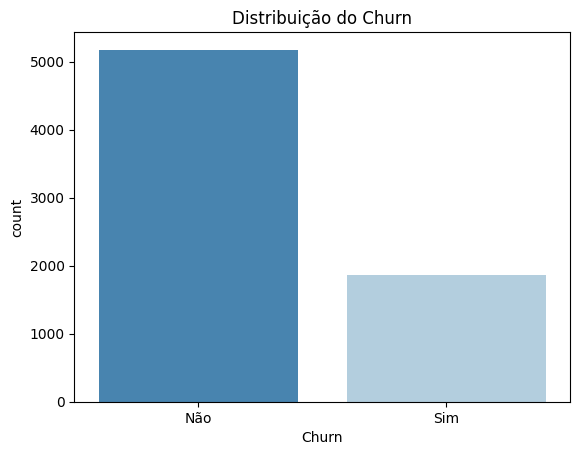

In [8]:
sns.countplot(x="Churn", data=df, palette="Blues_r")
plt.title("Distribuição do Churn")
plt.show()

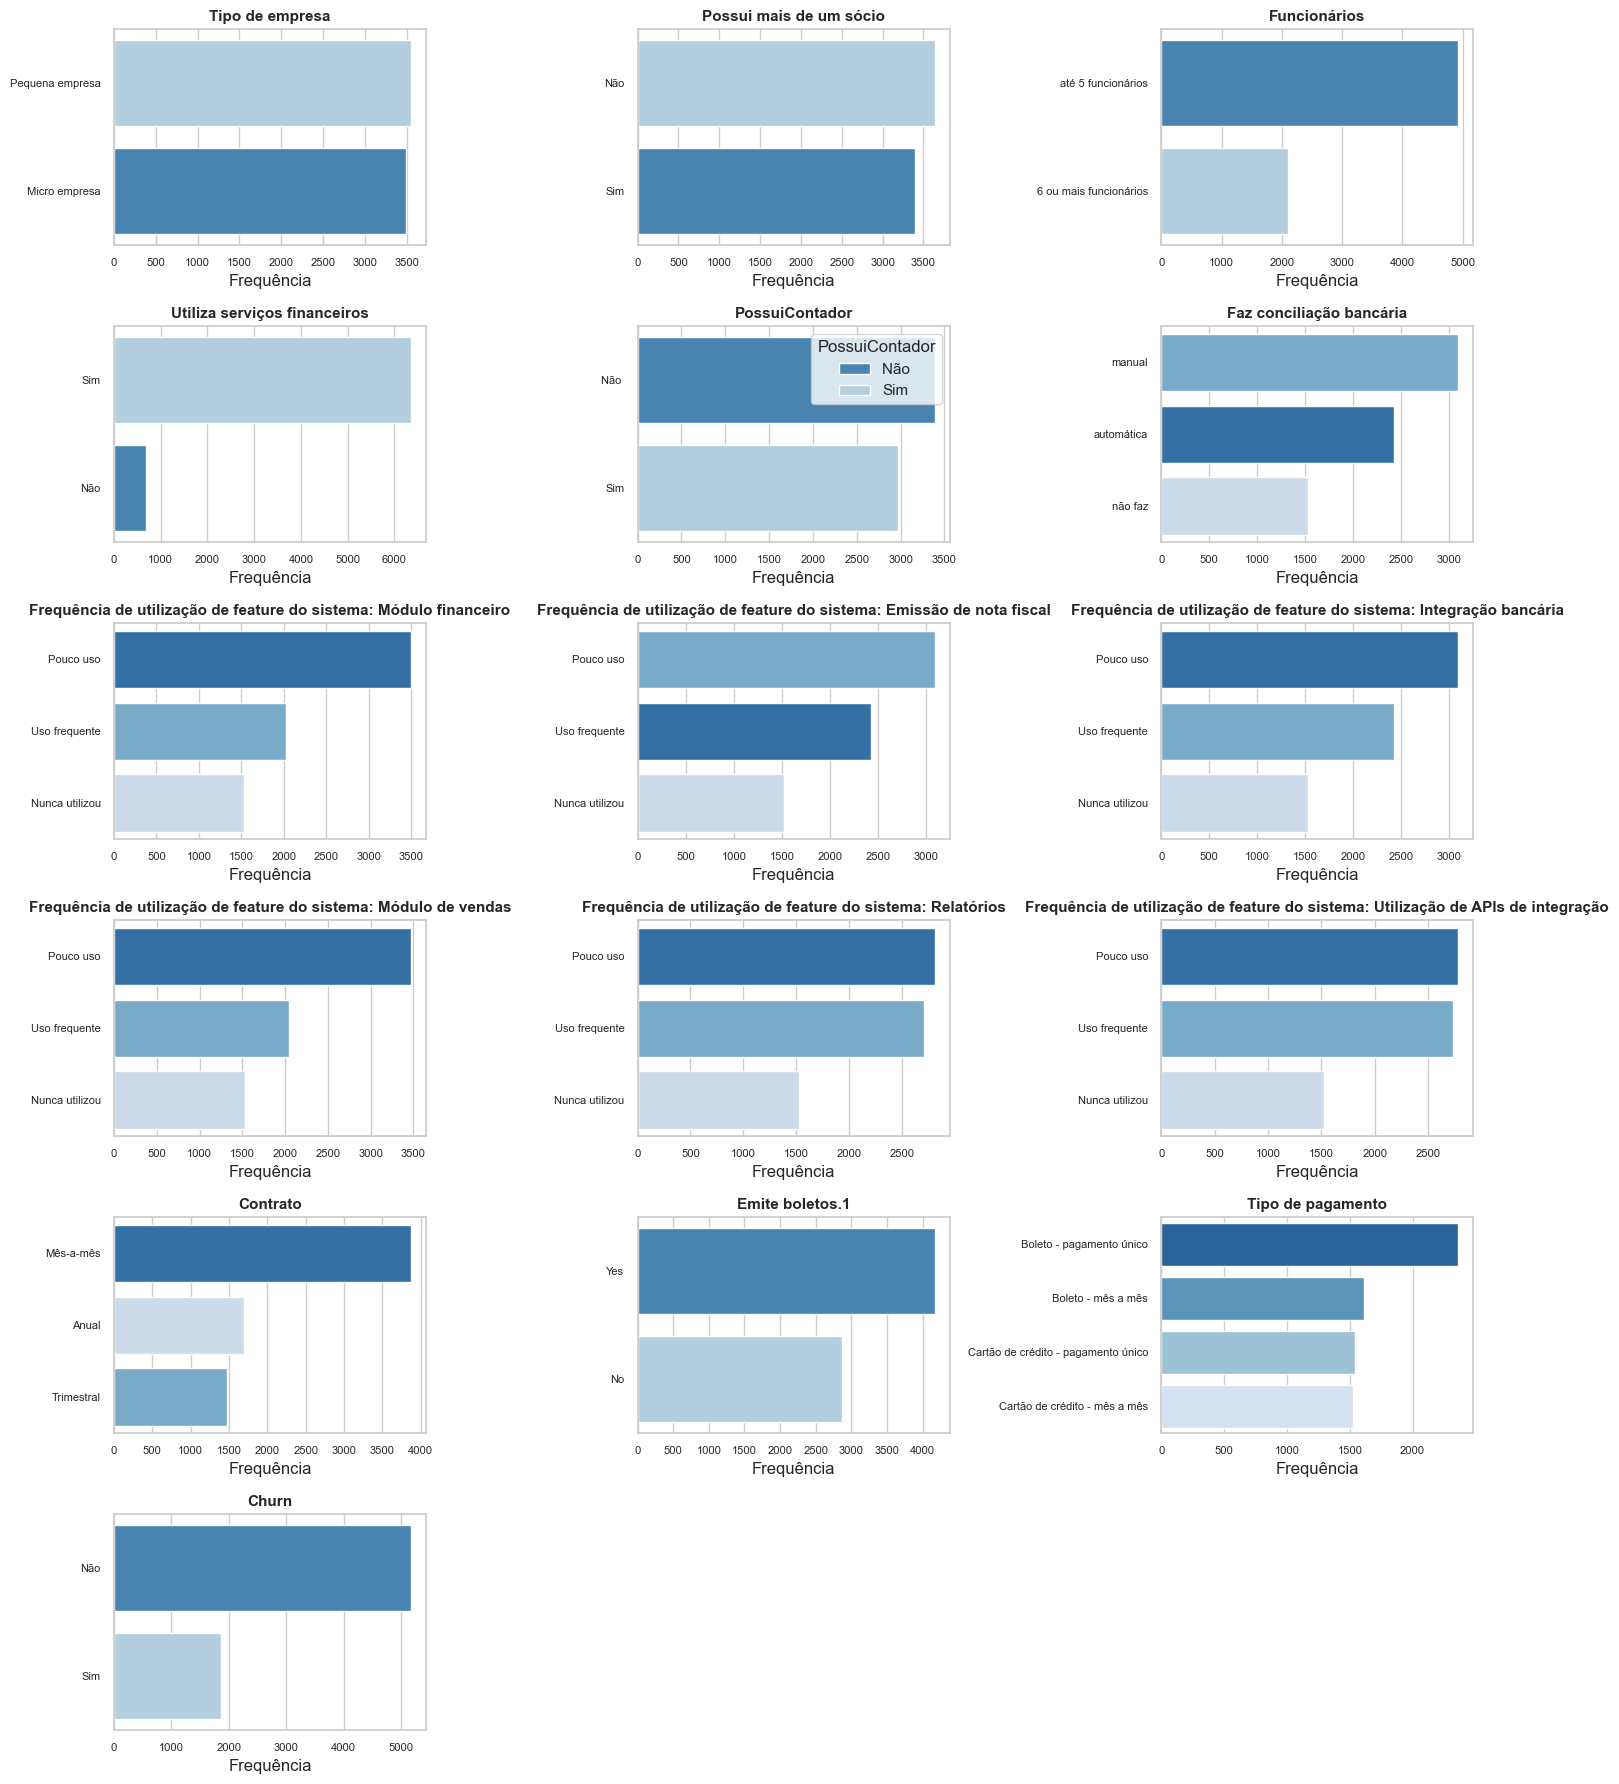

In [9]:
sns.set_theme(style="whitegrid") 
sns.set_palette("Blues_r")        
cat_cols = df.select_dtypes(include=["object"]).columns

# Tamanho da grade de subplots
n = len(cat_cols)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 3*nrows))

# Garantir array 2D para iterar
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(
        y=col, 
        data=df, 
        order=df[col].value_counts().index, 
        hue=col,
        ax=axes[i],
        palette="Blues_r"
    )
    axes[i].set_title(f"{col}", fontsize=11, fontweight="bold")
    axes[i].set_xlabel("Frequência")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis="y", labelsize=8)
    axes[i].tick_params(axis="x", labelsize=8)
    
# Remove subplots vazios
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

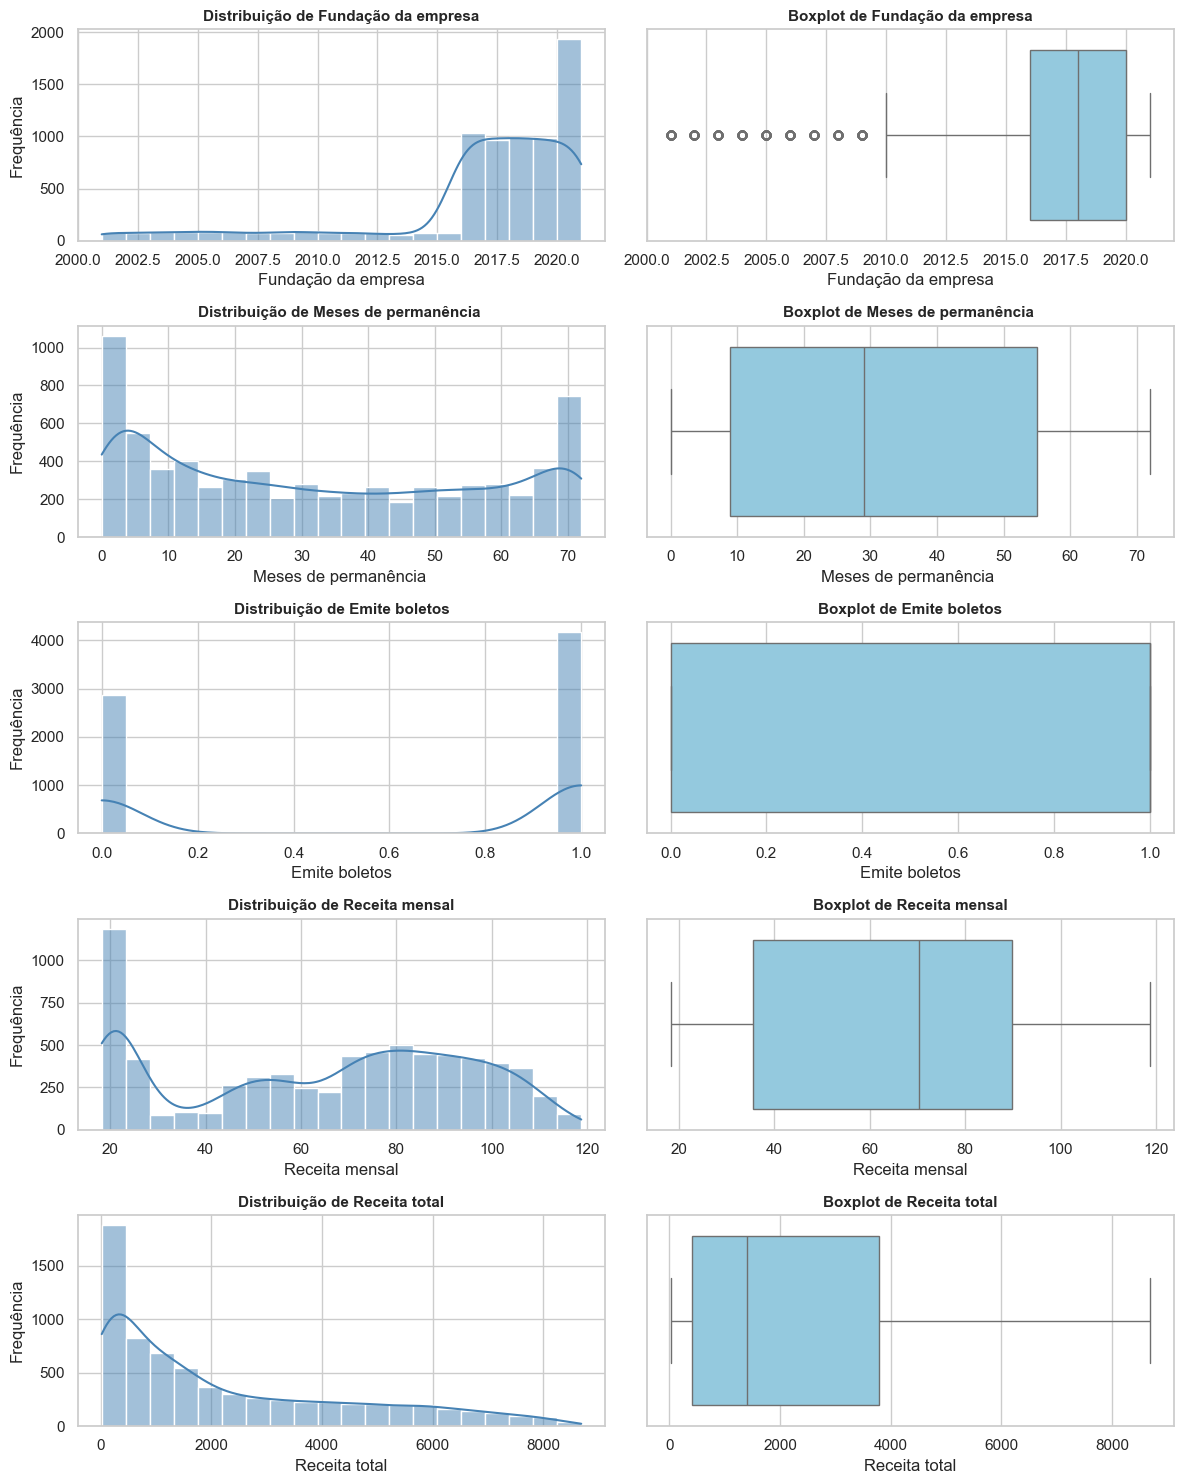

In [10]:
sns.set_theme(style="whitegrid")
sns.set_palette("Blues_r")
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols = [c for c in num_cols if c.lower() not in ["id"]] 

# Tamanho da grade de subplots
n = len(num_cols)
ncols = 2 
nrows = n

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3*nrows))

for i, col in enumerate(num_cols):
    # Histograma
    sns.histplot(df[col].dropna(), kde=True, bins=20, ax=axes[i,0], color="steelblue")
    axes[i,0].set_title(f"Distribuição de {col}", fontsize=11, fontweight="bold")
    axes[i,0].set_xlabel(col)
    axes[i,0].set_ylabel("Frequência")
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i,1], color="skyblue")
    axes[i,1].set_title(f"Boxplot de {col}", fontsize=11, fontweight="bold")
    axes[i,1].set_xlabel(col)
    axes[i,1].set_ylabel("")

plt.tight_layout()
plt.show()

#### Análise Bivariada

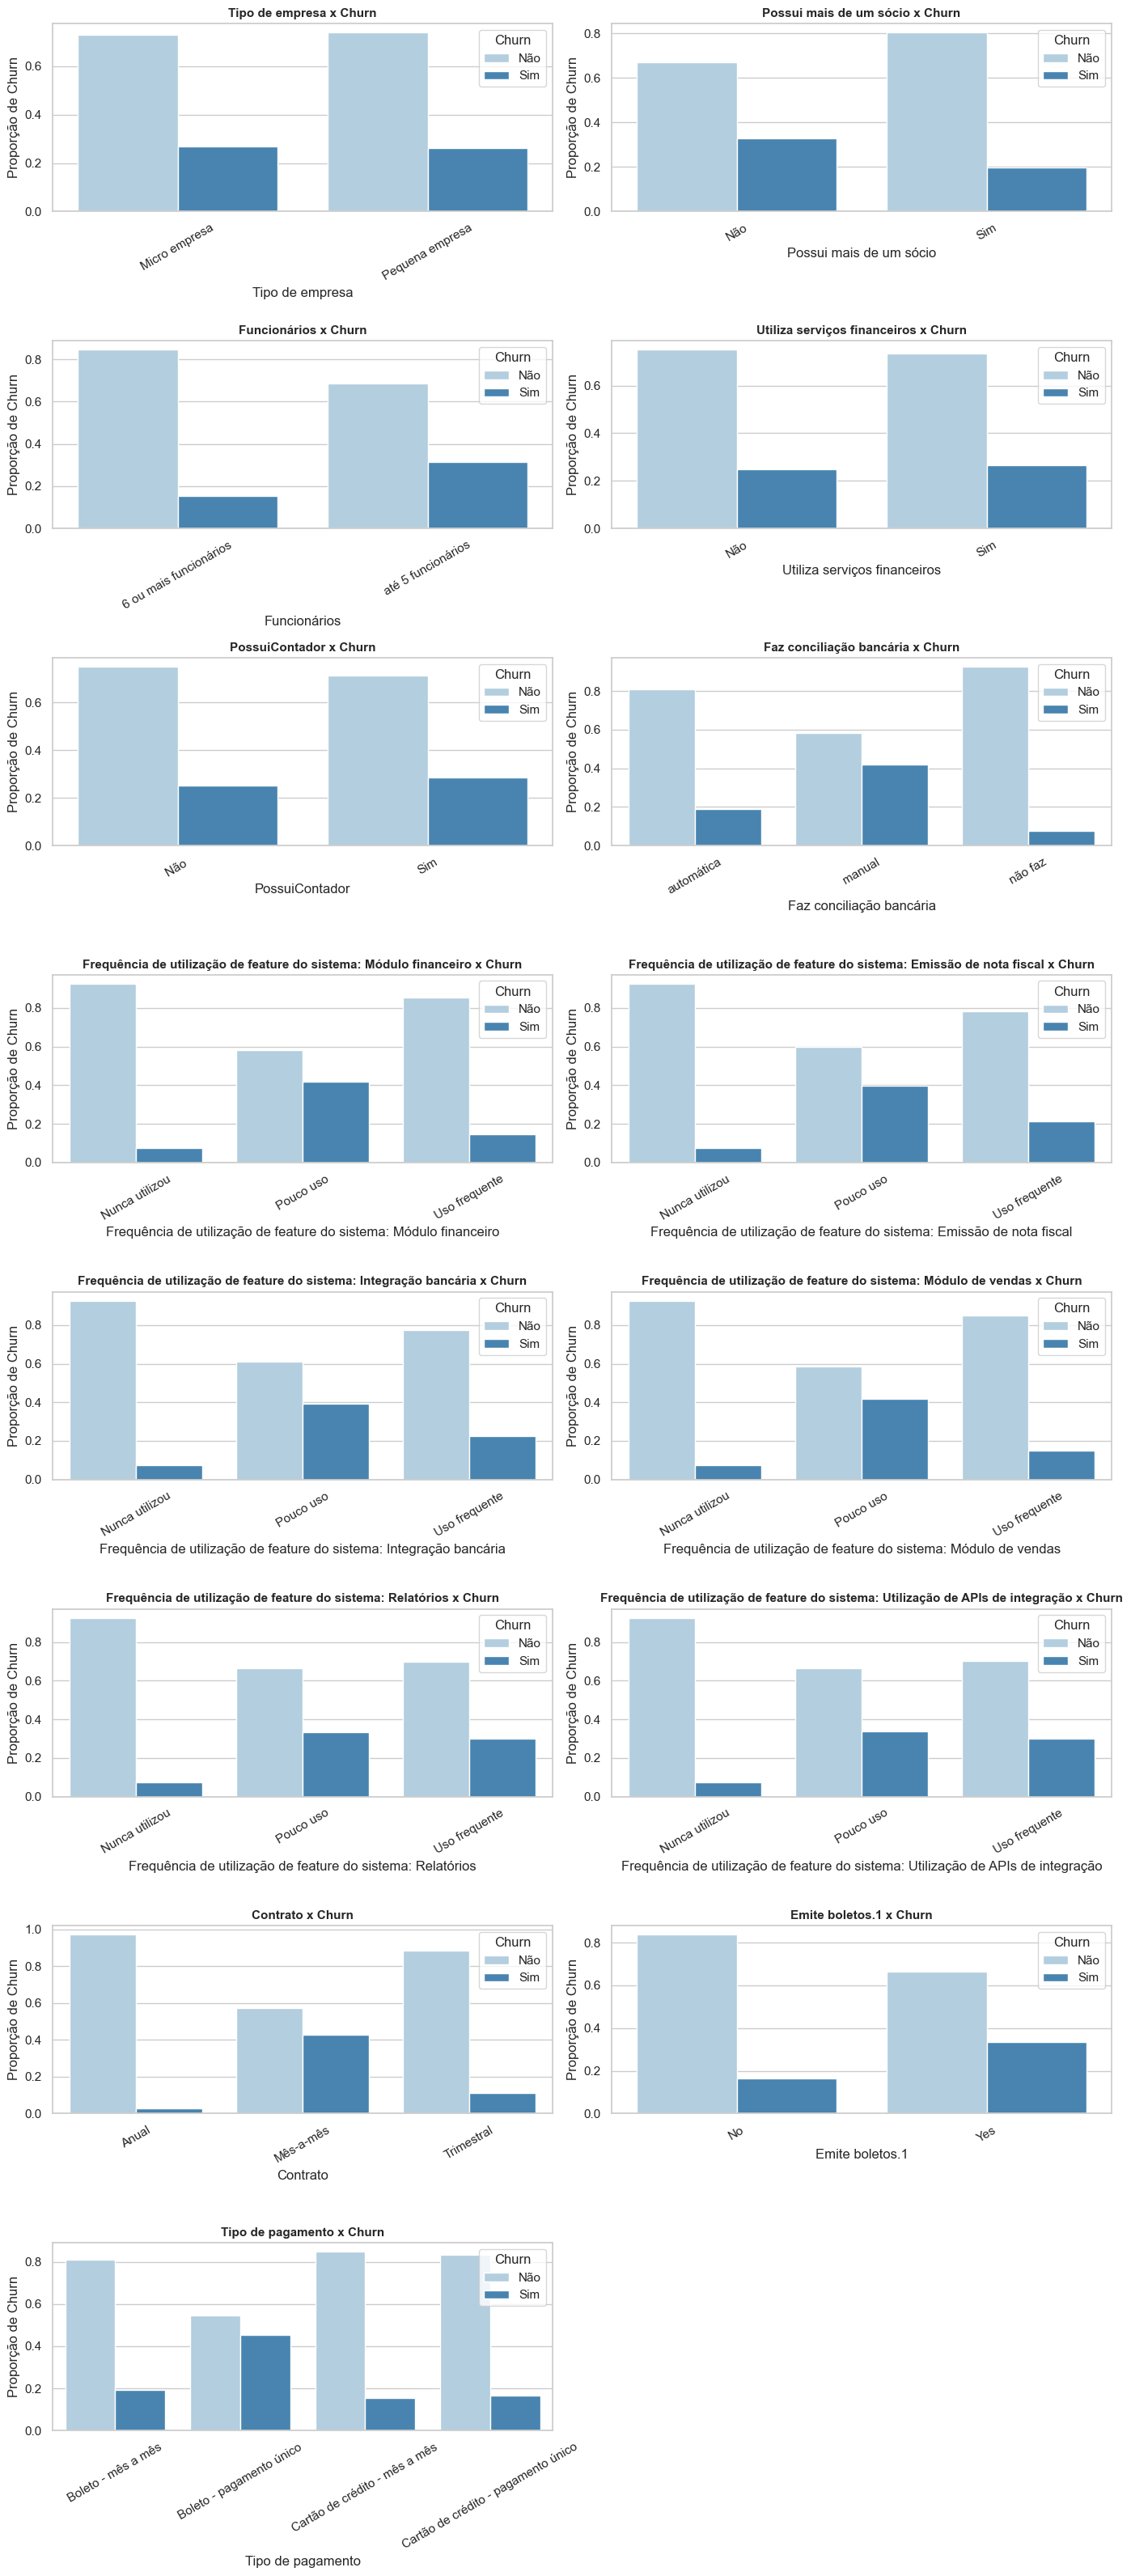

In [11]:
sns.set_theme(style="whitegrid")
sns.set_palette("Blues_r")

# Target
target = "Churn"
cat_cols = df.select_dtypes(include=["object"]).columns.drop(target)

# Grid de subplots
n = len(cat_cols)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    # proporções
    prop = (df.groupby([col, target]).size() / df.groupby(col).size()).reset_index(name="proporcao")
    
    sns.barplot(x=col, y="proporcao", hue=target, data=prop, ax=axes[i], palette="Blues")
    axes[i].set_title(f"{col} x {target}", fontsize=11, fontweight="bold")
    axes[i].tick_params(axis="x", rotation=30)
    axes[i].set_ylabel("Proporção de Churn")
    axes[i].set_xlabel(col)

# Remover eixos vazios (se n for ímpar)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Insights dos gráficos categóricos x Churn:

- Tipo de empresa: Pequenas empresas apresentam maior taxa de churn que microempresas.

- Funcionários: Empresas com até 5 funcionários têm mais churn.

- Sócios / Contador: Ter sócio ou contador reduz levemente o churn.

- Conciliação bancária: Automatização está associada a menor churn.

- Uso do sistema: Pouco uso ou nunca utilizar módulos (financeiro, vendas, relatórios, APIs) aumenta churn; uso frequente reduz churn.

- Contrato: Planos anuais têm churn muito baixo; mês a mês apresentam churn mais alto.

- Tipo de pagamento: Pagamentos com boleto em parcela única ou recorrente concentram mais churn; cartão de crédito tende a menor churn.

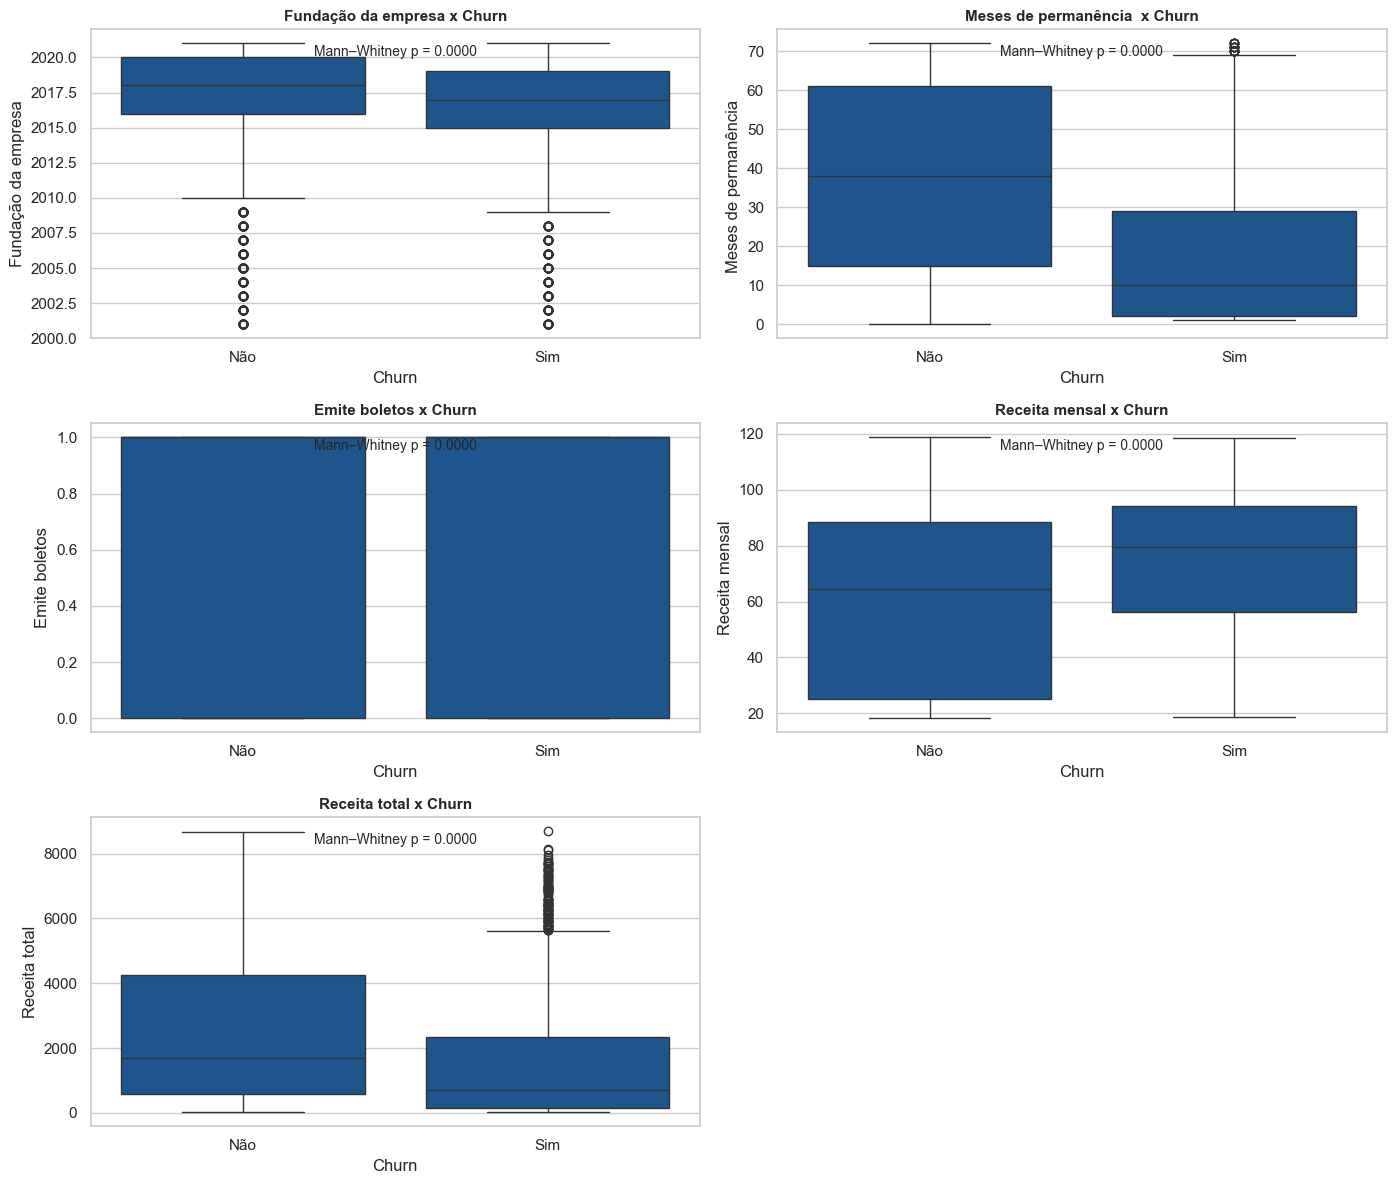

In [12]:
# Estilo storytelling (fundo claro + azul)
sns.set_theme(style="whitegrid")
sns.set_palette("Blues_r")
target = "Churn" 

# Seleciona numéricas e remove ID 
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c.lower() != "id"]

# Função segura para Mann–Whitney (descobre os 2 grupos automaticamente)
def mannwhitney_2groups(series, target_series):
    cats = pd.Series(target_series).dropna().unique()
    if len(cats) != 2:
        return None, None, 0, 0  
    g1, g2 = cats[0], cats[1]
    a = series[target_series == g1].dropna()
    b = series[target_series == g2].dropna()
    if len(a) == 0 or len(b) == 0:
        return None, None, len(a), len(b)
    stat, p = stats.mannwhitneyu(a, b, alternative="two-sided")
    return stat, p, len(a), len(b)

# Grid: 2 gráficos por linha
n = len(num_cols)
if n == 0:
    print("Não há colunas numéricas para analisar.")
else:
    ncols = 2
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4*nrows))
    if nrows * ncols == 1:
        axes = np.array([axes]) 
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        ax = axes[i]
        sns.boxplot(x=target, y=col, data=df, ax=ax)
        ax.set_title(f"{col} x {target}", fontsize=11, fontweight="bold")
        ax.set_xlabel(target)
        ax.set_ylabel(col)

        # Mann–Whitney + anotação de p-valor
        stat, p, n1, n2 = mannwhitney_2groups(df[col], df[target])
        if p is not None:
            ax.text(0.5, 0.95, f"Mann–Whitney p = {p:.4f}",
                    transform=ax.transAxes, ha="center", va="top", fontsize=10)
        else:
            ax.text(0.5, 0.95, f"Sem teste (amostras: {n1} e {n2})",
                    transform=ax.transAxes, ha="center", va="top", fontsize=10)

    # Remove eixos vazios
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

Insights das variáveis numéricas x Churn:

- Fundação da empresa: clientes que churnam tendem a ser empresas mais novas.

- Meses de permanência: churn é mais comum em clientes com baixa permanência.

- Receita mensal: clientes em churn apresentam receitas mensais mais altas.

- Receita total: apesar da receita mensal maior, o churn aparece em clientes com menor receita acumulada (tempo curto de casa).

- Emissão de boletos: praticamente não diferencia churn vs. não churn.

meses_col: Meses de permanência  | churn_col: Churn
n_sim: 1869 n_nao: 5174 | nunique_sim: 72 nunique_nao: 73


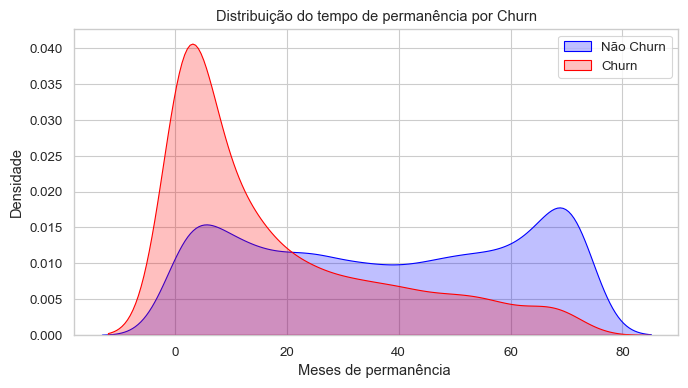

In [13]:
def _norm(s):
    s = ''.join(ch for ch in unicodedata.normalize('NFKD', str(s)) if not unicodedata.combining(ch))
    return re.sub(r'\s+', ' ', s).strip().lower()

# 1) Detectar colunas
meses_col = next((c for c in df.columns if ('meses' in _norm(c) and 'perman' in _norm(c))), None)
churn_col = next((c for c in df.columns if 'churn' in _norm(c)), None)
print("meses_col:", meses_col, "| churn_col:", churn_col)

# 2) Máscaras robustas para Churn (aceita Sim/Não/Yes/No/0/1/True/False)
churn_norm = df[churn_col].astype(str).str.strip().str.lower()
mask_sim = churn_norm.isin(['sim','s','yes','y','1','true'])
mask_nao = churn_norm.isin(['não','nao','n','no','0','false'])

# 3) Série numérica
meses_num = pd.to_numeric(df[meses_col], errors='coerce')

s_sim = meses_num[mask_sim].dropna()
s_nao = meses_num[mask_nao].dropna()

print("n_sim:", len(s_sim), "n_nao:", len(s_nao),
      "| nunique_sim:", s_sim.nunique(), "nunique_nao:", s_nao.nunique())

# 4) Plot com fallback: se KDE não for adequado, usa histograma
sns.set_context("paper", font_scale=1.1)
plt.figure(figsize=(7,4))

plotted = False
if len(s_nao) >= 2 and s_nao.nunique() >= 2:
    sns.kdeplot(s_nao, fill=True, color="blue", label="Não Churn")
    plotted = True
if len(s_sim) >= 2 and s_sim.nunique() >= 2:
    sns.kdeplot(s_sim, fill=True, color="red", label="Churn")
    plotted = True

if not plotted:
    # Fallback: histogramas sobrepostos normalizados
    if len(s_nao) > 0:
        sns.histplot(s_nao, bins=20, stat="density", alpha=0.4, color="blue", label="Não Churn")
    if len(s_sim) > 0:
        sns.histplot(s_sim, bins=20, stat="density", alpha=0.4, color="red", label="Churn")

plt.legend(loc="upper right")
plt.ylabel("Densidade")
plt.xlabel(meses_col)
plt.title("Distribuição do tempo de permanência por Churn")
plt.tight_layout()
plt.show()

- Clientes que churnam concentram-se nos primeiros meses de permanência, enquanto clientes não churn permanecem ativos por muito mais tempo.

#### Separação dos dados

In [14]:
X = df.drop(columns = "Churn")
y = df["Churn"].values

In [15]:
X = df.drop(columns=["ID", "Churn"])  # Features
y = df["Churn"].map({"Sim":1, "Não":0})  # Exemplo de binarização

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#### Pré-processamento

Cópia do DataFrame

- df = df.copy() → evita modificar o df original por acidente.

Tratamento de coluna duplicada

- Removeu "Emite boletos.1", que era redundante em relação a "Emite boletos".

Tratamento de valores ausentes em Receita Total

- Onde Receita total estava nula, você preencheu com:

- Receita total = Receita mensal * Meses de permanência, Isso cria consistência, já que faz sentido como proxy para receita acumulada.

Separação de variáveis numéricas e categóricas

- num_cols = todas as colunas numéricas.

- cat_cols = todas as colunas categóricas.

Definição do pré-processamento via ColumnTransformer:

- Numéricas:

- SimpleImputer(strategy="median") → preenche nulos com a mediana.

- StandardScaler() → padroniza (média = 0, desvio = 1).

- Categóricas:

- SimpleImputer(strategy="most_frequent") → preenche nulos com o valor mais frequente.

- OneHotEncoder(handle_unknown="ignore") → transforma categorias em variáveis dummies e ignora categorias desconhecidas.

- remainder="drop" → descarta colunas que não forem especificadas.


In [16]:
# Limpeza mínima do DF
df = df.copy()

# Se existir a coluna duplicada, remova a versão textual
if "Emite boletos.1" in df.columns:
    df = df.drop(columns=["Emite boletos.1"])

# Preencher 'Receita total' faltante com 'Receita mensal * Meses de permanência'
if "Receita total" in df.columns and "Receita mensal" in df.columns and "Meses de permanência" in df.columns:
    mask_rt_na = df["Receita total"].isna()
    df.loc[mask_rt_na, "Receita total"] = (
        df.loc[mask_rt_na, "Receita mensal"] * df.loc[mask_rt_na, "Meses de permanência"]
    )

# Seleção de colunas
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(exclude=["number"]).columns.tolist()

# Pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop"
)

In [28]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# calcula proporção para balancear as classes
scale = y_train.value_counts()[0] / y_train.value_counts()[1]

clf_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="auc",
        scale_pos_weight=scale,  # 👈 balanceamento
        random_state=42,
        use_label_encoder=False
    ))
])

In [29]:
# treino e avaliação
clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

c:\Projetos\Churn_Prediction\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:21:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1035
           1       0.53      0.70      0.60       374

    accuracy                           0.76      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.78      0.76      0.76      1409



Insights do modelo XGBoost com scale_pos_weight:

- Classe 0 (Não Churn): perdeu um pouco de recall (0.78), mas manteve boa precisão (0.88).

- Classe 1 (Churn): recall subiu bastante (0.70), ou seja, o modelo detecta bem mais churns reais, embora a precisão tenha caído para 0.53.

- Acurácia global: 76%, mas mais equilibrada entre as classes.

- Macro F1 (0.71): melhor equilíbrio geral entre churn e não churn.

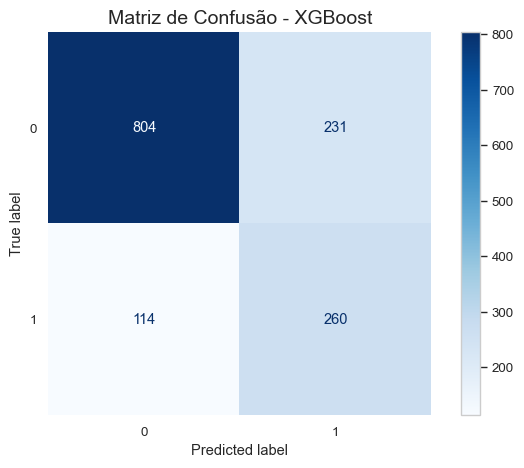

In [36]:
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    colorbar=True
)
plt.title("Matriz de Confusão - XGBoost", fontsize=14)
plt.gca().spines[:].set_visible(False)
plt.grid(False)
plt.tight_layout()
plt.show()

Insight da matriz de confusão:

- O modelo acerta bem Não Churn (804), mas ainda confunde muitos como churn (231).

- Para Churn, detecta 260 corretamente, mas deixa escapar 114.

- Padrão: bom em prever retenção, mas precisa melhorar na captura de churn.

<Figure size 600x500 with 0 Axes>

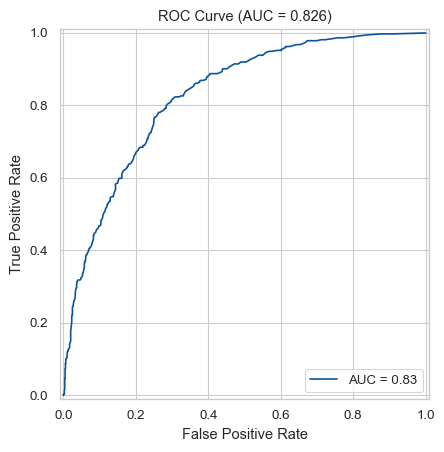

In [32]:
# Probabilidades previstas
y_proba = clf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.show()

- O modelo apresenta AUC = 0.83, indicando boa capacidade de separação entre churn e não churn.

<Figure size 600x500 with 0 Axes>

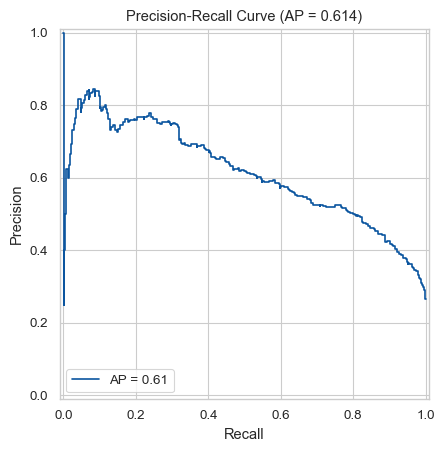

In [33]:
# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
PrecisionRecallDisplay(precision=prec, recall=rec, average_precision=ap).plot()
plt.title(f"Precision-Recall Curve (AP = {ap:.3f})")
plt.show()

- O modelo tem AP = 0.61, mostrando desempenho razoável, mas ainda com perda de precisão conforme aumenta o recall na detecção de churn.

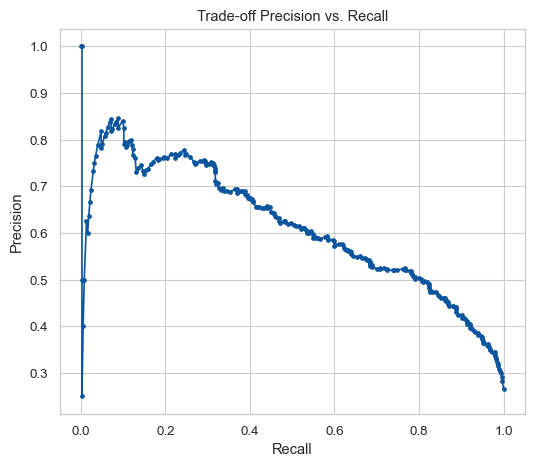

In [34]:
# Precisão x Recall
plt.figure(figsize=(6, 5))
plt.plot(rec, prec, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Trade-off Precision vs. Recall")
plt.grid(True)
plt.show()

- Há um claro trade-off: aumentar recall melhora a captura de churns, mas reduz a precisão. O ponto ótimo está em níveis intermediários de recall (~0.3–0.5).

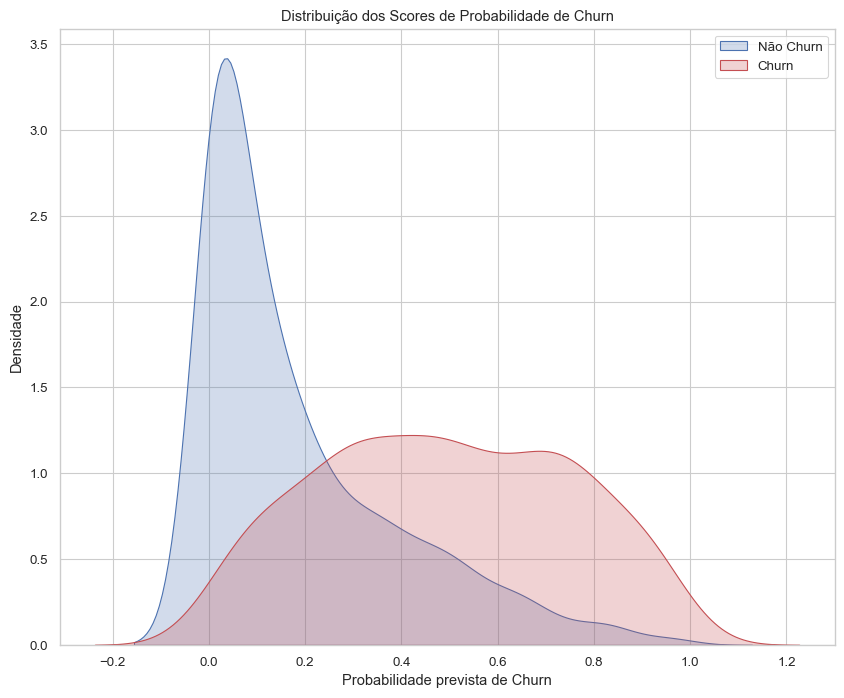

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.kdeplot(y_proba[y_test == 0], ax=ax, color="b", fill=True, label='Não Churn')
sns.kdeplot(y_proba[y_test == 1], ax=ax, color="r", fill=True, label='Churn')
plt.title("Distribuição dos Scores de Probabilidade de Churn")
plt.xlabel("Probabilidade prevista de Churn")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.show()

- Clientes Não Churn concentram-se em probabilidades baixas (<0.2), enquanto clientes Churn têm distribuição mais espalhada (0.3–0.8).  O modelo separa razoavelmente as classes, mas com sobreposição significativa.

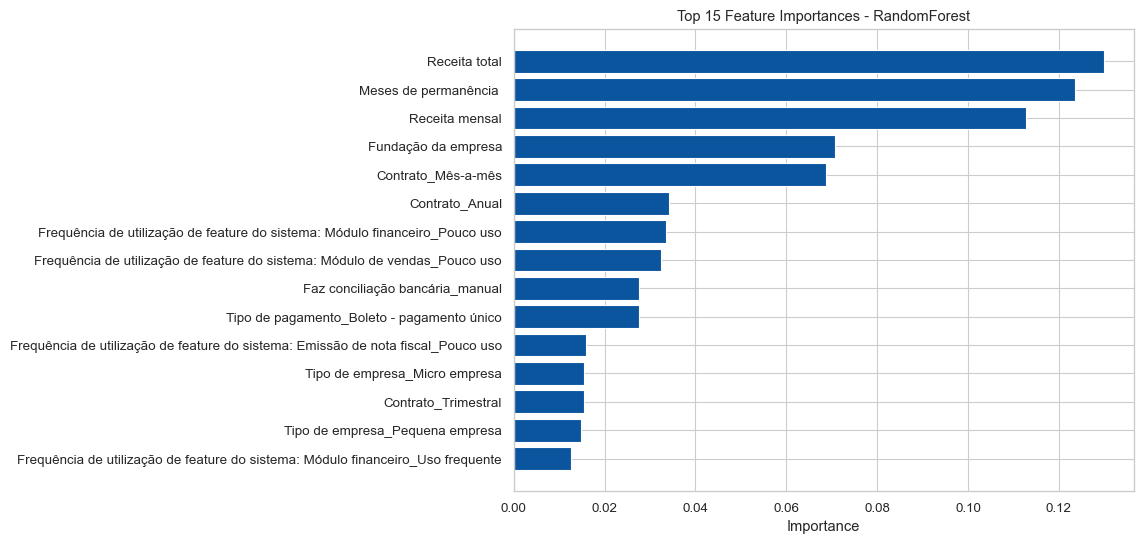

In [24]:
# Importância das Features
# Extrair nomes após OneHotEncoder
ohe = clf.named_steps["preprocessor"].named_transformers_["cat"].named_steps["ohe"]
cat_names = ohe.get_feature_names_out(cat_cols)

feature_names = np.concatenate([num_cols, cat_names])
importances = clf.named_steps["classifier"].feature_importances_

# Top 15 features
indices = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices][::-1], align="center")
plt.yticks(range(len(indices)), feature_names[indices][::-1])
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances - RandomForest")
plt.show()